<a href="https://colab.research.google.com/github/spicymaterial/zion-project/blob/master/Zion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries.


In [26]:
import tweepy
import json
import textblob
import re
import matplotlib.pyplot as plot
import pandas as pd

OAuth-2 Authorization from twitter

In [27]:
with open('credentials.json', 'r') as f:
    cred = json.load(f)
    
consumer_key = cred['api_key']
consumer_secret = cred['api_key_secret']
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

Defining function to fetch tweets(status) from the twitter server

In [28]:
def byUsername():
    user_name = input("Enter Username : ")
    user = api.get_user(user_name)
    timeline = api.user_timeline(user.id, tweet_mode = "extended")
    return timeline

def byQueries():
    query = input("Enter search query : ")
    num = input("Enter number of tweets : ")
    searched_tweets = api.search(q = query, count = num)
    ids = []
    for tweet in searched_tweets:
        ids.append(tweet.id)
    tweets = []
    for tweet_id in ids:
        tweets.append(api.get_status(tweet_id, tweet_mode = "extended"))
    return tweets

Defining `get_tweet_data` to get necessary attributes from status objefct

In [29]:
def get_tweet_data(tweets):
    header = ['id', 'author', 'full_text', 'retweet_count', 'favorite_count', 'Polarity']
    tweets_data = []
    for tweet in tweets:
        status_dict = vars(tweet)
        tweet_data = {}
        for key in status_dict.keys():
            if key in header:
                if key == 'author':
                    tweet_data[key] = status_dict[key].screen_name
                elif key == 'full_text':
                    text = status_dict[key].replace("\u2019", "'")
                    tweet_data[key] = text
                else:
                    tweet_data[key] = status_dict[key]
        tweets_data.append(tweet_data)
    return tweets_data


Getting a polarity of a tweet

In [30]:
def get_polarity(tweet):
    text = tweet['full_text']
    clean_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    analysis = textblob.TextBlob(clean_text)
    return analysis.sentiment.polarity

Getting the user input and showing the graph of polarity vs tweet author from the fetched tweets

1. Get tweet data by username
2. Get tweet data by query
3. Exit
Enter Choice : 2
Enter search query : elonmusk
Enter number of tweets : 5


,id,author,full_text,retweet_count,favorite_count,Polarity
0,1313005372270170112,Zorraug,@elonmusk Even Funny Valentine can't escape gr...,0,0,0.041667
1,1313005344164110336,OptaHos,@zakariannn @elonmusk So is Armenia. Shut up.,0,0,0.000000
2,1313005332579450880,tanveershahbuk1,RT @OwenSparks_: “It is financially *insane* t...,223,0,-0.562500
3,1313005332021600256,tga_tgoodfellow,RT @OwenSparks_: “It is financially *insane* t...,223,0,-0.562500
4,1313005329056112642,BombayFables,RT @Nawazuddin_S: P̶r̶i̶m̶i̶t̶i̶v̶e̶ minds thi...,61,0,0.000000


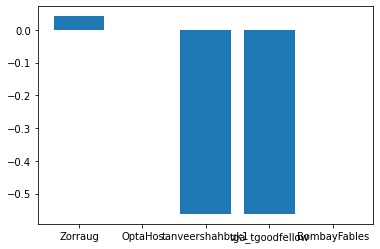

Do you want to save the data(Y/N) : n
_________________________________________________________________

1. Get tweet data by username
2. Get tweet data by query
3. Exit
Enter Choice : 1
Enter Username : elonmusk


,id,author,full_text,retweet_count,favorite_count,Polarity
0,1312760295228547073,elonmusk,New SpaceX droneship will be called “A Shortfa...,3356,59239,0.136364
1,1312755779951226880,elonmusk,"Nothing can escape gravity, not even black hol...",10216,156371,0.016667
2,1312749532933877761,elonmusk,@ID_AA_Carmack Would be cool to put yourself i...,207,6138,0.350000
3,1312591262747299841,elonmusk,@Model3teslaJ Coming soon,66,1172,0.000000
4,1312545997499719680,elonmusk,"Call of Booty, great game",58001,474128,0.200000
5,1312544132380778496,elonmusk,https://t.co/HyfszSrm6m,11997,167800,0.000000
6,1312253928667410432,elonmusk,@teslaownersSV @SpaceX Vector-space bird's eye...,252,3335,0.000000
7,1312252573575860226,elonmusk,@PPathole @SpaceX Unexpected pressure rise in ...,139,2491,0.100000
8,1312251818731167744,elonmusk,@Erdayastronaut @SpaceX All of that and more. ...,260,5477,0.187500
9,1312250543553744896,elonmusk,@alandail @SpaceX Exactly,40,1438,0.250000


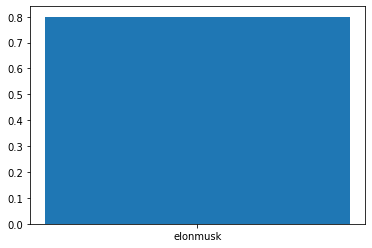

Do you want to save the data(Y/N) : y
Enter file name : data
Data added to the file...
_________________________________________________________________

1. Get tweet data by username
2. Get tweet data by query
3. Exit
Enter Choice : 3


In [31]:
while True:
    x_axis = []
    y_axis = []
    print("1. Get tweet data by username")
    print("2. Get tweet data by query")
    print("3. Exit")
    choice = input("Enter Choice : ")
    if choice != '1' and (choice != '2' and choice != '3'):
        print("Invalid Choice...\n_________________________________________________________________\n")
        continue
    elif choice == '3':
        break
    elif choice == '1':
        data = get_tweet_data(byUsername())
        for tweet in data:
            tweet['Polarity'] = get_polarity(tweet)
            x_axis.append(tweet['author'])
            y_axis.append(get_polarity(tweet))
    elif choice == '2':
        data = get_tweet_data(byQueries())
        for tweet in data:
            tweet['Polarity'] = get_polarity(tweet)
            x_axis.append(tweet['author'])
            y_axis.append(get_polarity(tweet))
    col = ['id', 'author', 'full_text', 'retweet_count', 'favorite_count', 'Polarity']
    df = pd.DataFrame(data = data, columns = col)
    display(df)
    
    #fig = plot.figure()
    #ax = fig.add_axes([0, 0, 1, 1])
    #plot.show()
    plot.bar(x_axis, y_axis)
    plot.show()    
    
    choice2 = input("Do you want to save the data(Y/N) : ")
    if choice2.lower() == 'y':
        file_name = input("Enter file name : ")
        df.to_csv(file_name +'.csv')
        with open(file_name + '.json', 'w') as f:
           f.write(json.dumps(data, indent = 4))
        print("Data added to the file...")
    print("_________________________________________________________________\n")
